
#2.2 qx.rd

#3.1 tq_usrStkMerge

 df_usr
                inx        cash  total  000001  002046  600663  000792  600029  000800
date                                                                                  
2017-01-04 3145.700  988905.000      0   9.024  11.923  21.881  13.094   6.980  11.095
2017-01-05 3161.520  977695.000      0   9.034  12.513  21.918  13.128   7.084  11.210
2017-01-09 3160.160 1000805.000      0   9.006  12.730  22.019  13.117   7.064  11.555
2017-02-09 3174.320  993640.000      0   9.169  15.694  22.222  12.416   7.165  11.280
2017-02-10 3191.890  973939.000      0   9.194  15.567  22.308  12.483   7.218  11.378
2017-02-13 3208.560  970020.000      0   9.243  15.265  22.282  12.596   7.272  11.513
2017-02-14 3214.690  953441.000      0   9.263  15.260  22.471  12.526   7.316  11.670
2017-02-15 3217.750  936709.000      0   9.307  15.253  23.223  12.408   7.425  11.650
2017-02-16 3219.510  919971.000      0   9.320  15.395  23.516  12.422   7.418  11.632
2


 
#4.3,ret#3
              inx  total  000001  002046  600663  000792  600029  000800
date                                                                    
2017-01-05  0.005  0.000   0.001   0.049   0.002   0.003   0.015   0.010
2017-01-06 -0.000  0.000  -0.002   0.014   0.003  -0.012  -0.001   0.016
2017-01-09 -0.000  0.000  -0.001   0.004   0.002   0.011  -0.002   0.015
2017-01-10  0.002  0.000   0.001   0.026   0.001   0.004   0.045  -0.000
2017-01-11 -0.005  0.000  -0.000  -0.031  -0.007  -0.002  -0.005  -0.016
2017-01-12 -0.007  0.000   0.000  -0.018  -0.015  -0.014  -0.020  -0.007
2017-01-13 -0.004  0.000   0.001  -0.024  -0.005  -0.022  -0.004  -0.015
2017-01-16 -0.008  0.000  -0.002  -0.057   0.009  -0.031  -0.001  -0.034
2017-01-17  0.002  0.000   0.000  -0.034   0.010  -0.014  -0.005  -0.010
2017-01-18  0.005  0.000   0.003   0.012  -0.001   0.008   0.010   0.010
              inx  total  000001  002046  600663  000792  600029  000800
date                                 

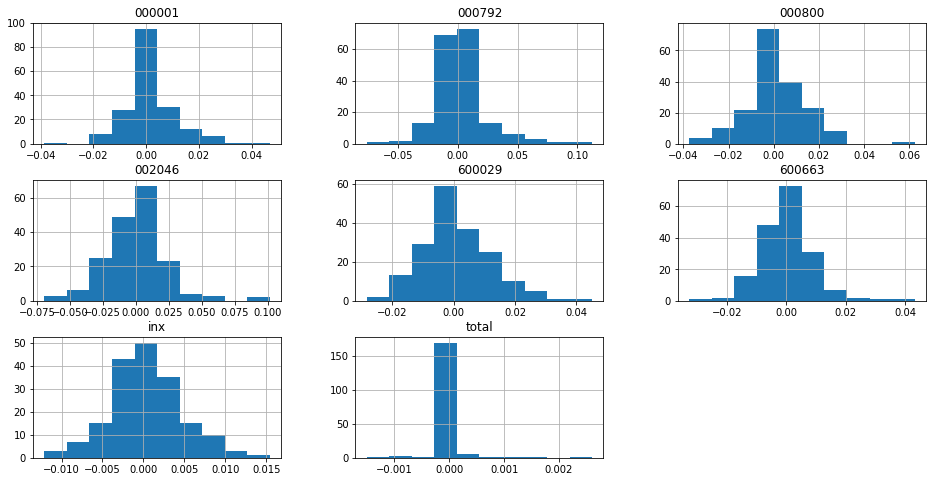

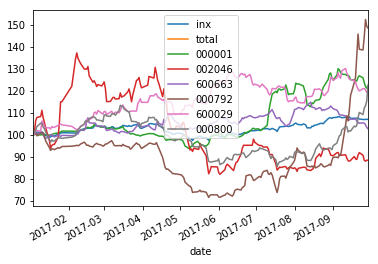

In [4]:
# -*- coding: utf-8 -*-
'''
TopQuant-简称TQ极宽智能量化回溯分析系统，培训课件-配套教学python课件程序

Top极宽量化(原zw量化)，Python量化第一品牌 
by Top极宽·量化开源团队 2017.10.1 首发

网站： www.TopQuant.vip      www.ziwang.com
QQ群: Top极宽量化1群，124134140
      Top极宽量化2群，650924099
      Top极宽量化3群，450853713
  
  
'''

import os,arrow,ffn,pickle
import numpy as np
import pandas as pd
import tushare as ts

import plotly as py
import plotly.figure_factory  as pyff
#2
import keras
from keras import initializers,models,layers
from keras.models import Sequential,load_model
from keras.layers import Flatten,Dense, Input, Dropout, Embedding,SimpleRNN,Bidirectional,LSTM,Conv1D, GlobalMaxPooling1D,Activation,MaxPooling1D,GlobalAveragePooling1D
from keras.optimizers import RMSprop
from keras.utils import plot_model

#  TopQuant
import zsys 
import zpd_talib as zta
import ztools as zt
import ztools_tq as ztq
import ztools_bt as zbt
import ztools_sta as zsta
import ztools_str as zstr
import ztools_data as zdat
import ztools_datadown as zddown
import ztools_draw as zdr


%matplotlib inline
#-------------------           


#1 预处理
pd.set_option('display.width', 450)    
pd.set_option('display.float_format', zt.xfloat3)    
pyplt=py.offline.plot    
#---------------


#2 set data 设置数据
codLst=['000001','002046','600663','000792','600029','000800']
xlst=['inx','total']+codLst
# 数据源使用的是案例 8-4中的回溯结果数据文件
print('\n#2.2 qx.rd')
fss='data/TM2_tqvar.pkl';
qx=zt.f_varRd(fss)

#3 合并量化结果数据
print('\n#3.1 tq_usrStkMerge')      
df_usr=ztq.tq_usrStkMerge(qx)
zt.prDF('df_usr',df_usr)

# 进一步整理量化结果数据
print('\n#3.2 tq_usrDatXed')      
df2,k=ztq.tq_usrDatXed(qx,df_usr)
zt.prDF('df2',df2)
#
print('\n#3.3 ret')      
print('ret:',k,'%')
# 再一次整理结果数据，主要是填充交易订单字段中为空值的数据字段，
# 并裁剪为便于ffn金融模块库处理的数据格式。
print('\n#3.4 tq_usrDatXedFill')      
df=ztq.tq_usrDatXedFill(qx,df2)
zt.prDF('df',df)

#==============
#4 ret xed
# 对数格式计算回报率 
ret=ffn.to_log_returns(df[xlst]).dropna()
zt.prDF('\n#4.1,ret#1',ret)

# 按照标准格式计算回报率 
ret=ffn.to_returns(df[xlst]).dropna()
zt.prDF('\n#4.2,ret#2',ret)
#
ret[xlst]=ret[xlst].astype('float')
zt.prDF('\n#4.3,ret#3',ret)

# 制作回报率分布直方图 
#5 ret.hist
print('\n#5 ret.hist')
ax = ret.hist(figsize=(16,8))

#6 使用corr函数，根据回报率计算各只股票
print('\n# ret.corr()')
ret=ret.corr().as_format('.2f')
zt.prDF('\n#6 ret.corr',ret)

#7
print('\n#7 rebase')
df2=df.rebase()
ax = df2.plot()
zt.prDF('\n#7 rebase',df2)
        



#8.1 calc_stats
Stat                 inx         total       000001      002046      600663      000792      600029      000800
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2017-01-04  2017-01-04  2017-01-04  2017-01-04  2017-01-04  2017-01-04  2017-01-04  2017-01-04
End                  2017-09-29  2017-09-29  2017-09-29  2017-09-29  2017-09-29  2017-09-29  2017-09-29  2017-09-29
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         6.39%       0.41%       22.03%      -12.77%     2.52%       47.69%      18.44%      21.18%
Daily Sharpe         1.24        1.20        1.87        -0.32       0.31        1.78        1.41        1.36
Daily Sortino        2.23        2.40        3.61        -0.56       0.56        3.72        2.81        2.43
CAGR                 8.81%       0.56%       31.17%      -16.99%     3.45%     

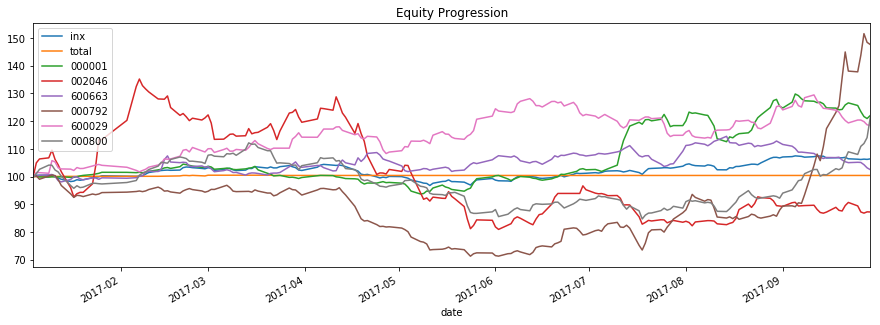

In [6]:
#8  df=ztq.tq_usrDatXedFill(qx,df2) 前面已经整理过 
print('\n#8.1 calc_stats')
perf = df.calc_stats()
perf.plot()
print(perf.display())



In [8]:

#8
xcod='002046'
print('\n#8.2 display_monthly_return')
m1=perf[xcod].display_monthly_returns()
print(m1)

print('\n#8.3 xcod.stats')
m2=perf[xcod].stats
print(m2)

#9
print('\n#9 r2')
ret = df.to_log_returns().dropna()
r2=ret.calc_mean_var_weights().as_format('.2%')
print(r2)


#8.2 display_monthly_return
  Year    Jan    Feb    Mar     Apr     May    Jun     Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  ------  ------  -----  ------  -----  -----  -----  -----  -----  ------
  2017  13.36    6.9  -1.29  -14.24  -17.89   13.1  -12.32   7.03  -2.42      0      0      0  -12.77
None

#8.3 xcod.stats
start                    2017-01-04 00:00:00
end                      2017-09-29 00:00:00
rf                                     0.000
total_return                          -0.128
cagr                                  -0.170
max_drawdown                          -0.401
calmar                                -0.423
mtd                                   -0.024
three_month                           -0.098
six_month                             -0.298
ytd                                   -0.128
one_year                                 NaN
three_year                               NaN
five_year                                NaN
ten_year     